<a href="https://colab.research.google.com/github/ruedas91/FinTechruedas/blob/main/GC_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Upload winequality.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving winequality.csv to winequality.csv


In [3]:
# Read in data
df = pd.read_csv("winequality.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [16]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [17]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(
        units=number_hidden_nodes,
        input_dim=number_input_features,
        activation="relu"
    )
)

# Output layer
nn.add(
    Dense(
        units=1,
        activation="linear"
    )
)

In [18]:
# Compile the model
nn.compile(
    loss="mean_squared_error", 
    optimizer="adam", 
    metrics=["mse"]
)
# Train the model
model_1 = nn.fit(
    X,
    y,
    validation_split=0.3,
    epochs=200
)

Epoch 1/200
35/35 [==============================] - 1s 13ms/step - loss: 39.1708 - mse: 39.1708 - val_loss: 29.4901 - val_mse: 29.4901
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 35.0262 - mse: 35.0262 - val_loss: 26.7799 - val_mse: 26.7799
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 31.4100 - mse: 31.4100 - val_loss: 24.3054 - val_mse: 24.3054
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 28.1923 - mse: 28.1923 - val_loss: 22.0403 - val_mse: 22.0403
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 25.2440 - mse: 25.2440 - val_loss: 19.9237 - val_mse: 19.9237
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 22.4998 - mse: 22.4998 - val_loss: 17.9253 - val_mse: 17.9253
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 19.9335 - mse: 19.9335 - val_loss: 16.0751 - val_mse: 16.0751
Epoch 8/200
35/35 [==============================] - 0

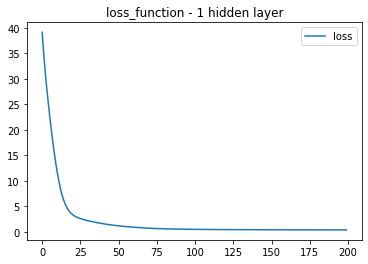

In [19]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

## Define a model with 2 hidden layers

In [20]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer2, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [21]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 6ms/step - loss: 29.8197 - mse: 29.8197 - val_loss: 30.3081 - val_mse: 30.3081
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 27.6058 - mse: 27.6058 - val_loss: 28.9843 - val_mse: 28.9843
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 25.0970 - mse: 25.0970 - val_loss: 27.3371 - val_mse: 27.3371
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 22.5841 - mse: 22.5841 - val_loss: 25.4860 - val_mse: 25.4860
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 20.2716 - mse: 20.2716 - val_loss: 23.5675 - val_mse: 23.5675
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 18.2327 - mse: 18.2327 - val_loss: 21.6934 - val_mse: 21.6934
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 16.4436 - mse: 16.4436 - val_loss: 19.8269 - val_mse: 19.8269
Epoch 8/200
35/35 [==============================] - 0s

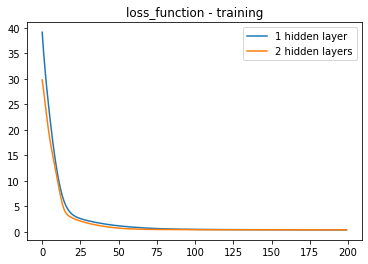

In [22]:
# Overlay results of deep and shallow models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

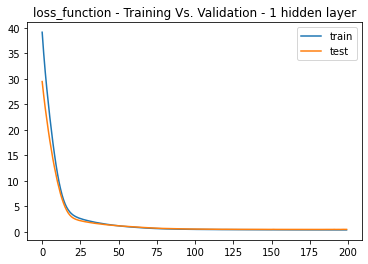

In [23]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

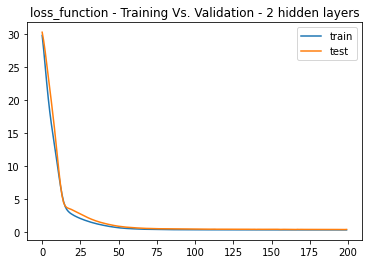

In [24]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()